# Particle physics data-analysis with CMS open data

##   Author:  Niall Mullane
###     PID:  99S380224
##   Class:  PH412, Spring, 2018                                          
###     Helpers:  Meekhel Patel

##  Program:  Z Boson assignment without pps tools                                    
###     Due Date:  April 10, 2019                                               
###     Language:  Python 3                 
###     IDE:  Jupyter     

##  Purpose:  Analyzing the Z boson      
##   "Bugs":  No major problems  


Welcome to the exercise where real data from CMS experiment at CERN is used for a simple particle physics data-analysis. The goal for the exercise is to discover the appearance of Z boson, determine the mass and the lifetime of Z and compare the results to the known values of these.

In the exercise invariant mass values will be calculated for muon pairs that are detected in the CMS detector. A histogram will be made from the calculated invariant mass values. After that a Breit-Wigner fit will be made to the histogram. With the fitted Breit-Wigner function it will be possible to determine the mass and the lifetime of Z boson.

In the end there will be also a quick look about how a pseudorapidity effects to the mass distribution of muon pairs.

The structure of the exercise is following:
- theory background
- calculation of invariant masses
- making the histogram
- fitting the function to the histogram
- analysing the histogram
- looking the histogram of the whole range of data
- the effect of pseudorapidity to the mass distribution

Now take a relaxed position and read the theory background first. Understanding the theory is essential for reaching the goal and learning from the exercise. So take your time and enjoy the fascination of particle physics!

## Theory background

Particle physics is the field of physics where structures of matter and radiation and interactions between them are studied. In experimental particle physics research is made by accelerating particles and colliding them to others or to solid targets. This is done with the _particle accelerators_. The collisions are examined with _particle detectors_.

World's biggest particle accelerator, Large Hadron Collider (LHC), is located at CERN, the European Organization for Nuclear Research. LHC is 27 kilometers long circle-shaped synchrotron accelerator. LHC is located in the tunnel 100 meters underground on the border of France and Switzerland (image 1).

<figure>
    <img src="images/LHC.png" alt="image missing" style="height: 350px" />
    <figcaption>Image 1: The LHC accelerator and the four detectors around it. &copy; <a href="https://cds.cern.ch/record/1708847">CERN</a> [1]</figcaption>
</figure>

In 2012 the ATLAS and CMS experiments at CERN made an announcement that they had observed a new particle which mass was equal to the predicted mass of the Higgs boson. The Higgs boson and the Higgs field related to it explain the origin of the mass of particles. In 2013 Peter Higgs and François Englert, who predicted the Higgs boson theoretically, were awarded with the Nobel prize in physics.

### Accelerating particles

The LHC mainly accelerates protons. The proton source of the LHC is a bottle of hydrogen. Protons are produced by stripping the electrons away from the hydrogen atoms with help of an electric field.

Accelerating process starts already before the LHC. Before the protons arrive in the LHC they will be accelerated with electric fields and directed with magnetic fields in Linac 2, Proton Synchrotron Booster, Proton Synchrotron and Super Proton Synchrotron accelerators. After those the protons will receive energy of 450 GeV. Also the protons will be directed into constantly spreaded bunches in two different proton beams. Each beam contains 2808 proton bunches located about 7,5 meters from each others. Each of these bunches include $1\text{,}2\cdot 10^{11}$ protons.

After the pre-accelerating the two proton beams are directed to the LHC accelerator. The beams will circulate in opposite directions in two different vacuum tubes. Image 2 shows a part of the LHC accelerator opened with the two vacuum tubes inside. Each of the proton beams will reach the energy of about 7 TeV (7000 GeV) in LHC.

<figure>
    <img src="images/LHC2.jpg" alt="image missing" style="height: 350px" />
    <figcaption>Image 2: Part of the LHC accelerator opened. &copy; <a href="https://cds.cern.ch/record/905940">CERN</a> [2]</figcaption>
</figure>

Particle collisions are created by crossing these two beams that are heading in opposite directions. When two proton bunches cross not all of the protons collide with each others. Only about 40 protons per bunch will collide and so create about 20 collisions. But because the bunches are travelling so fast, there will be about 40 million bunch crosses per one second in the LHC. That means there will be 800 million proton collisions every second in the LHC. That's a lot of action!

The maximum energy in collisions is 14 TeV. However in most cases the collision energy is smaller than that because when protons collide it is really the quarks and gluons which collide with each others. So all of the energy of the protons won't be transmitted to the collision.

When the protons collide the collision energy can be transformed into mass ($E=mc^2$). So it is possible that new particles are produced in the collisions. By examining and measuring the particles created in collisions, researchers try to understand better for example the dark matter, antimatter and the constitution of all matter.

In image 3 there is a visualisation of some particles created in one collision event. These particles are detected with the CMS detector.

<figure>
    <img src="images/eventdisplay.png" alt="image missing" style="height: 450px" />
    <figcaption>Image 3: A visualised collision event.</figcaption>
</figure>

### Video

The acceleration and collision processes are summarised well in the short video below. Watch the video from the start until 1:15 to get a picture about these processes. You can start the video by running the code cell below (click the cell and then press CTRL + ENTER).

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Examining particle collisions

Particle collisions are examined with _particle detectors_. In LHC particle beams are crossed in four different sections. These sections are the locations of four particle detectors of LHC: ATLAS, LHCb, ALICE and CMS (check the image 1). This exercise focuses on the CMS detector and on the data it collects.

CMS, the Compact Muon Solenoid, is a general-purpose detector. Goals of the CMS are for example studying the standard model, searching for extra dimensions and searching for particles that could make up dark matter.

Simplified, the goal of the CMS detector is to detect particles that are created in collisions and measure different quantities from them. The detector consists of different detectors that can detect and measure different particles. The structure of the CMS detector is shown in the image 4.

<figure>
    <img src="images/CMS.jpg" alt="image missing" style="height: 360px" />
    <figcaption>Image 4: The CMS detector opened. &copy; <a href="https://cds.cern.ch/record/1433717">CERN</a> [3]</figcaption>
</figure>

The detectors form an onion-like structure to the CMS. This structure ensures that as many as possible particles from the collision is detected.

Different particles act differently in the detectors of the CMS. Image 5 shows the cross-section of the CMS detector. The particle beams would travel in and out from the plane. Image 5 also demonstrates how different particles act in the CMS.

<figure>
    <img src="images/CMS2.gif" alt="image missing" style="height: 350px" />
    <figcaption>Image 5: The cross-section of the CMS and different particle interactions in it. &copy; <a href="https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172">CERN</a> [4]</figcaption>
</figure>

Innermost part is the silicon tracker. The silicon tracker makes it possible to reconstruct trajectories of charged particles. Charged particles interact electromagnetically with the tracker and make the tracker to create an electric pulse. An intense magnetic field bends the trajectories of the charged particles. With the curvature of the trajectories shown by the pulses created in the tracker, it is possible to calculate the momenta of the charged particles.

Particle energies can be measured with help of the calorimeters. Electrons and photons will stop to the Electromagnetic Calorimeter (ECAL). Hadrons, for example protons or neutrons, will pass through the ECAL but will be stopped in the Hadron Calorimeter (HCAL).

ECAL is made from lead tungstate crystals that will produce light when electrons and photons pass through them. The amount of light produced is propotional to the energy of the particle. So it is possible to determine the energy of the particle stopped in ECAL with the photodetectors. Also the operation of the HCAL is based on detecting light.

Only muons and weakly interacting particles like neutrinos will pass both the ECAL and HCAL. Energies and momenta of muons can be determined with the muon chambers. The detection of the momentum is based on electrical pulses that muons create in the different sections of the muon chambers. Energies of muons can't be measured directly, but the energies will be determined by calculating them from the other measured quantities.

Neutrinos can't be detected directly with the CMS, but the existence of them can be derived with the help of missing energy. It is possible that the total energy of the particles detected in a collision is smaller than the energy before the collision. This makes a conflict with the energy conservation. The situation indicates that something has been left undetected in the collision, so there is a possibility that neutrons are created in the collision.

### Question 1

#### This exercise focuses on muons that are detected with the CMS detector. How can you describe the behaviour and detection of muons in the CMS?

The trajectories of charged particles are bent due to a strong magnetic field that allows the momentum to be calculated, and the energy of the muons is detected by measuring the amount of light produces in the ECAL.

### Recording the data

As mentioned above, there happens about billion particle collision in the CMS in one second. The detector can detect all of these but it would be impossible to record all data from these collisions. Instead right after a collision different trigger systems will decide whether the collision has been potentially interesting or not. Non-interesting collision will not be recorded. This multi-staged triggering process reduces the amount of recorded collisions from billion to about thousand collisions per second.

Data collected from collisions will be saved to AOD (Analysis Object Data) files that can be opened with the ROOT program (https://root.cern.ch/). Structures of the files are very complicated so those can't be handled for example in simple data tables.

In this exercise a CSV file format is used instead of the AOD format. A CSV file is just a regular text file that contains different values separated with commas (check the image 6). These files can be easily read and handled with the Python programming language.

<figure>
    <img src="images/datafile.png" alt="image missing" style="height: 80px" />
    <figcaption>Image 6: An example of the structure of the CSV file.</figcaption>
</figure>

### Indirect detection of particles

Not every particle can be detected directly as explained above with the CMS or other particle detectors. Interesting processes are often short-lived. These processes can be searched throughout long-lived processes so detecting is then indirect.

For example the Z boson (the particle that mediates weak interaction) can't be detected directly with the CMS since the lifetime of the Z is very short. That means that the Z boson will decay before it even reaches the silicon detector of the CMS.

How it is possible to detect the Z boson then? A solution to this question comes from the decay process of the Z boson. If particles that originate from the decay of the Z are prossible to detect, it is also possible to deduce the existence of the Z. So the detection is indirect.

The Z boson can decay with 24 different ways. In this exercise only one of these is observed: the decay of the Z to the muon $\mu^-$ and the antimuon $\mu^+$. This decay process is shown as a Feynman diagram in the image 7.

<figure>
    <img src="images/Zdecay.png" alt="image missing" style="height: 170px" />
    <figcaption>Image 7: The process where the Z boson decays to the muon and the antimuon.</figcaption>
</figure>

Muons that are created in the decay process can be detected with the CMS. But just the detection of the muon and the antimuon isn't a sufficient evidence of the existence of the Z. The detected two muons could originate from any of processes that will happen in the collision event (there are many different processes going on the same time). Because of this the mass of the Z is also needed to be reconstructed.

### The invariant mass

The mass of the Z boson can be determined with the help of a concept called _invariant mass_. Let's next derive loosely an expression for the invariant mass.

Let's observe a situation where a particle with mass $M$ and energy $E$ decays to two particles with masses $m_1$ and $m_2$, and energies $E_1$ and $E_2$. Energy $E$ and momentum $\vec{p}$ is concerved in the decay process so $E = E_1 +E_2$ and $\vec{p} = \vec{p}_1+ \vec{p}_2$.

Particles will obey the relativistic dispersion relation:

$$
Mc^2 = \sqrt{E^2 - c^2\vec{p}^2}.
$$

And with the concervation of energy and momentum this can be shown as

$$
Mc^2 = \sqrt{(E_1+E_2)^2 - c^2(\vec{p_1} + \vec{p_2})^2}
$$
$$
=\sqrt{E_1^2+2E_1E_2+E_2^2 -c^2\vec{p_1}^2-2c^2\vec{p_1}\cdot\vec{p_2}-c^2\vec{p_2}^2}
$$
$$
=\sqrt{2E_1E_2 - 2c^2 |\vec{p_1}||\vec{p_2}|\cos(\theta)+m_1^2c^4+m_2^2c^4}. \qquad (1)
$$

The relativistic dispersion relation can be brought to the following format

$$
M^2c^4 = E^2 - c^2\vec{p}^2
$$
$$
E = \sqrt{c^2\vec{p}^2 + M^2c^4},
$$

from where by setting $c = 1$ (very common in particle physics) and by assuming masses of the particles very small compared to momenta, it is possible to get the following:

$$
E = \sqrt{\vec{p}^2 + M^2} = |\vec{p}|\sqrt{1+\frac{M^2}{\vec{p}^2}}
\stackrel{M<<|\vec{p}|}{\longrightarrow}|\vec{p}|.
$$

By applying the result $E = |\vec{p}|$ derived above and the setting $c=1$ to the equation (1), it can be reduced to the format

$$
M=\sqrt{2E_1E_2(1-\cos(\theta))},
$$

where $\theta$ is the angle between the momentum vector of the particles. With this equation it is possible to calculate the invariant mass for the particle pair if energies of the particles and the angle $\theta$ is known.

In experimental particle physics the equation for the invariant mass is often in the form

$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}, \qquad (2)
$$

where transverse momentum $p_T$ is the component of the momentum of the particle that is perpendicular to the particle beam, $\eta$ the pseudorapidity and $\phi$ the azimuth angle. The pseudorapidity is defined with the $\theta$ with the equation $\eta = -\ln(\tan(\frac{\theta}{2}))$. So basically the pseudorapidity describes an angle. Also $\phi$ is describing an angle.

Image 8 expresses $\theta$, $\eta$ and $\phi$ in the CMS detector. The particle beams will travel to the z-direction. Image 8 also shows that because of the determination of $\eta$ it goes to 0 when $\theta = 90^{\circ}$ and to $\infty$ when $\theta = 0^{\circ}$.

<figure>
    <img src="images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 8: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

### Reconstructing the Z mass

With the invariant mass it is possible to prove the existence of the Z boson. In this exercise only the decay of the Z to two muons shown in the image 7 is handled.

This exercise uses data that contains collisions where two muons have been detected (among with many of other particles). It is possible to calculate an invariant mass value for the muon pair in an one collision event with the equation (2). And this can be repeated for a great amount of collision events.

If the invariant mass of the muon pair is equal to the mass of the Z boson it can be verified that the muon pair originates from the deacay of the Z. And if the invariant mass of the muon pair gets some other value the muons will originate from some other processes. __So the invariant mass can be used as an evidence about the existence of the Z boson__.

### Identifying the Z boson

In practice the identification of the Z boson goes in the following way. The invariant mass for two muons is calculaetd for the great amount of collision events. Then a histogram is made from the calcuated values. The histogram shows how many invariant mass values will be in each bin of the histogram.

If a peak (many invariant mass values near the same bin compared to other bins) is formed in the histogram, it can prove that in the collision events there has been a particle which mass corresponds to the peak. After that it is possible to fit a function to the histogram and determine the mass and the lifetime of the Z from the parameters of the fitted function.

### Question 2

Let's practice the calculation of the invariant mass with the following task. Let's assume that for one muon pair the following values have been measured or determined:

- $p_{T1} = 58,6914$ GeV/c
- $p_{T2} = 45,7231$ GeV/c
- $\eta_1 = -1,02101$
- $\eta_2 = -0,37030$
- $\phi_1 = 0,836256$ rad
- $\phi_2 = 2,741820$ rad

Calculate the invariant mass value for this single pair of muons.

Compare the calculated value to the mass of the Z boson reported by the Particle Data Group (PDG, http://pdg.lbl.gov/). What do you notice? Can you make sure conclusions from your notifications?

That's the end of the theory part of this exercise. You can now move on to analysing the data.

## Calculating the invariant mass

In this section the data-analysis is started by calculating the invariant masses of the muon pairs that are detected in the collision events. Analysis will be done with the Python programming language.

The data used in the analysis has been collected by the CMS detector in 2011. From the original data a CSV file containing only some of the collision events and information has been derived. The original data is saved in AOD format that can be read with ROOT program. Open the link http://opendata.cern.ch/record/17 and take a look how large the original datafile is from the section _Characteristics_.

From the original datafile only collision events with exactly two muons detected have been selected to the CSV file. The selection is done with the code similar to the one in the link http://opendata.cern.ch/record/552. In practice the code will select wanted values from the original file and write them to the CSV file. You can get an example of a CSV file by clicking the link http://opendata.cern.ch/record/545 and downloading one of the CSV files from the bottom of the page to your computer.

The CSV file used in this excercise is already saved to the same repository than this notebook file. Now let's get the file with Python and start the analysis!

### Initialisation and getting the data

In the code cell below needed Python modules _pandas_, _numpy_ and _matplotlib.pyplot_ are imported and named as _pd_, _np_ and _plt_. Modules are files that contain functions and commands for Python language. Modules are imported because not all of the things needed in the exercise could be done with the Python's built-in functions.

Also the data file from the repository is imported and saved to the variable named `ds`. __Don't change the name of the variable.__ The file is imported with the function `read_csv()` from the pandas module. So in the code there has to be an reference to pandas module (that we named as _pd_) in front of the function.

First we want to figure out how many collision events (or in this case data rows) there are in the data file. Add to the code cell below needed code to print out the number of rows of the imported file. With Python printing is done with the `print()` function where the thing that is wanted to be printed will be written inside the brackets. The length of an object can be determined with the `len()` function. Inside the brackets will be written the variable which length is wanted to be determined.

You can run the code cell by clicking it active and then pressing CTRL + ENTER. Feel free to test different solutions for printing the length of the file.

After you have printed the number of the rows in the datafile, you can move on to the next section. First try to figure it out yourself, but if you get stuck click on the hints below.

<details>
    <summary>Hint 1</summary>
    
    The data was saved to the variable that was named as "ds".
</details>

<details>
    <summary>Hint 2</summary>
    
    Write the function "len()" inside the function "print()": "print(len(variablename))", where variablename
    refers to the name of your variable.
</details>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_csv('DoubleMuRun2011A.csv')

# This is a comment separated with #-symbol. Comments do not affect to the code.
# Add your own code to print the number of collision events in the datafile!

#### What does the file look like?

The file was saved as a _DataFrame_ structure (practically a table) of _pandas_ module in a variable called `ds`. Next print the five first rows of the file to look properly how does the file look. With the `print()` function it is possible to print a variable inside the brackets. With the function _variablename_`.head()` you can get the first five rows of the data file by changing the _variablename_ with the name of your variable.

Write a code that prints the five first rows of the data file and run the code cell by clicking it active and pressing CTRL + ENTER. First try to figure it out yourself, but if you get stuck click on the hint below.

<details>
    <summary>Hint</summary>
    
    Hint: "print(variablename.head())"
</details>

In [4]:
print(ds.head())

      Run     Event Type1        E1       px1       py1       pz1      pt1  \
0  165617  74601703     G   9.69873 -9.510430  0.366205   1.86329  9.51748   
1  165617  75100943     G   6.20385 -4.266610  0.456545  -4.47930  4.29097   
2  165617  75587682     G  19.28920 -4.212080 -0.651623  18.81210  4.26219   
3  165617  75660978     G   7.04268 -6.326780 -0.268545   3.08025  6.33248   
4  165617  75947690     G   7.27507  0.102966 -5.533080  -4.72122  5.53403   

       eta1     phi1  ...  Type2       E2       px2       py2      pz2  \
0  0.194546  3.10311  ...      G  9.76332  7.327710 -1.152370  6.34728   
1 -0.912070  3.03499  ...      G  9.66898  7.273970 -2.821120 -5.71040   
2  2.190460 -2.98811  ...      G  9.82439  4.343940 -0.473505  8.79849   
3  0.469033 -3.09917  ...      G  5.58571  4.474760  0.848935 -3.23185   
4 -0.773616 -1.55219  ...      G  7.31811 -0.398831  6.940810  2.28247   

       pt2      eta2      phi2  Q2         M  
0  7.41776  0.775564 -0.155984   1  17.

The "\\" symbols in the output tell that a row won't fit totally on a screen but continues to next rows of the output. The first row shows which information about muon pairs the file contains. For example E1 is the energy of the first muon and E2 the energy of the second etc. Here are the different values listed:

- Run = number of the run where data has been collected from
- Event = number of the collision event
- Type = type of the muon, global muon (G) has been measured both in the silicon tracker and muon chambers, tracker myon (T) has been measured only in the silicon tracker (these classifications are hypotheses since the type cannot be known absolutely)
- E = energy of the muon
- px, py, pz = different coordinates of momentum of the muon
- pt = transverse momentum, that is the component of momentum of the muon that is perpendicular to the particle beams
- eta = $\eta$ = pseudorapidity, a coordinate describing an angle (check the image 8)
- phi = $\phi$ = azimuth angle, also a coordinate describing an angle (check the image 8)
- Q = electrical charge of the muon

#### Calculating the invariant mass

Next calculate invariant mass values for muon pairs in each event with the different values from the data file. You have to write a proper equation only once since code executes the equation automatically for each row of the file.

For example if you would like to sum the electrical charges of two muons for each event and save results in a variable _charges_, it could be done with the following code:
```
charges = ds.Q1 + ds.Q2
```

So you have to tell in the code that Q1 and Q2 refer to values in the variable `ds`. This can be done by adding the variable name separated with a dot in front of the value that is wanted, as in the example above.

There are square root, cosine and hyperbolic cosine terms in the equation of invariant mass. Those can be fetched from the _numpy_ module that we named as _np_. You can get a square root with the function `np.sqrt()`, a cosine with `np.cos()` and a hyperbolic cosine with `np.cosh()`. Naturally inside the brackets there will be anything that is inside the square root or brackets in the equation too.

__Write below a code__ that will calculate the invariant mass value for muon pairs in each collision event in the data file. Save the values calculated in the variable `invariant_mass` that is already written in the code cell. Don't change the name of the variable.

After running, the code will print the first five values that are calculated. Also the output will tell if the values are correct. This is done with a small piece of code at the end of the cell.

You can get help from the theory part. Also use the hints below if you get stuck. But first try different solutions by yourself and try to figure it out without the hints!

<details>
    <summary>Hint 1</summary>
    
    Use the equation (2) of the theory part for the calculation.
</details>

<details>
    <summary>Hint 2</summary>
    
    When you write different quantities of the equation to your code, remember to refer to the variable from where you want to get the quantities. For example if you would need the quantity "pt1", write "ds.pt1" to the code.
</details>

<details>
    <summary>Hint 3</summary>
    
    In practice write the equation (2) to one line to the code after the text "invariant_mass = ". Remember that you can get a cosine, a hyperbolic cosine and a square root from "numpy" module with the way that is described above. Also remember to tell from which variable you want to get the different quantities (hint 2).
</details>

In [6]:
pt = 2* ds.pt1 * ds.pt2
eta = np.cosh(ds.eta1 - ds.eta2)
phi = np.cos(ds.phi1 - ds.phi2)

invariant_mass = np.sqrt(pt*(eta - phi))
print('The first five values calculated (in units GeV):')
print(invariant_mass[0:5])

# Rest of the code is for checking if the values are correct. You don't have to change that.
if 14.31 <= invariant_mass.values[4] <= 14.32:
    print('Invariant mass values are correct!')
else:
    print('Calculated values are not yet correct. Please check the calculation one more time.')
    print('Remember: don´t change the name of the variable invariant_mass.')

The first five values calculated (in units GeV):
0    17.490875
1    11.551382
2     9.160909
3    12.475632
4    14.314303
dtype: float64
Invariant mass values are correct!


## Making the histogram

Next let's make a histogram from the calculated invariant mass values. The histogram describes how the values are distributed, that is, how many values there has been in each bin of the histogram. In the image 9 there is a histogram that represents how the amount of cash in a wallet has been distributed for some random group of people. One can see from the histogram that for example the most common amount of cash has been 10–15 euros (12 persons have had this).

<figure>
    <img src="images/histogram.png" alt="image missing" style="height: 350px" />
    <figcaption>Image 9: An example histogram from the distribution of the amount of cash.</figcaption>
</figure>

#### Creating the histogram

Histograms can be created with Python with the _matplotlib.pyplot_ module that was imported before and named as _plt_. With the function `plt.hist()` it is possible to create a histogram by giving different parameters inside the brackets. These parameters can be examined from https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html.

Now only the first three of the parameters are needed: a variable from which values the histogram is created (_x)_, number of bins (_bins_) and the lower and upper range of the bins (_range_).

Write down a code that will create a histogram from the invariant mass values that were calculated. Because this exercise focuses on the Z boson, set the range wisely to get the values near the mass of the Z boson. Use the Z boson mass value that you looked earlier from the Particle Data Group as a reference.

Try what is the best amount of bins to make a clear histogram. You can try different values and see how they affect to the histogram.

In the code there are already lines for naming the axes and the title of the histogram. Also there are comments marked with # symbols. These comments doesn't affect to the functionality of the code.

If you get stuck use the hints below. But try to create the histogram without using the hints!

<details>
    <summary>Hint 1</summary>
    
    The invariant mass values that you have calculated are saved in the variable "invariant_mass".
</details>

<details>
    <summary>Hint 2</summary>
    
    The function is in the form "plt.hist(x, bins=0, range=(0,0))", where x will be replaced with the name of the variable that contains the data that is wanted to be used in the histogram (in our case the invariant masses). The zeroes will be replaced with the wanted amount of bins and with the lower and upper limits of the histogram.
</details>

<details>
    <summary>Hint 3</summary>
    
    Try different bin values between 50 and 200.
</details>

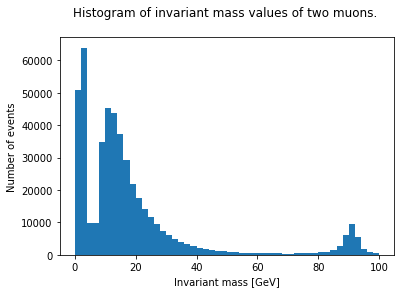

In [9]:
# Write down there a code that will create the histogram.

plt.hist(invariant_mass, bins=50, range=[0,100])
# Let's name the axes and the title. Don't change these.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant mass values of two muons. \n')
plt.show()

### Question 3

Describe the histogram. What information you can get from it?

## Fitting the function to the histogram

To get information about mass and lifetime of the detected resonance, a function that describes the distribution of the invariant masses must be fitted to the values of the histogram. In our case the values follow a Breit-Wigner distribution:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant.

The Breit-Wigner distribution can also be expressed in the following form:

$$
\frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

where the constant $K$ is written open.

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

With the code below it is possible to optimize a function that represents Breit-Wigner distribution to the values of the histogram. The function is already written in the code. It is now your task to figure out which the values of the maximum of the distribution $M$ and the full width at half maximum of the distribution $\Gamma$ could approximately be. The histogram that was created earlier will help in this task.

Write these initial guesses in the code in the line `initials = [#THE INITIAL GUESS FOR GAMMA, #THE INITIAL GUESS FOR M, -2, 200, 13000]`. In other words replace the two comments in that line with the values that you derived.

Notice that the initial guesses for parameters _a, b_ and _A_ have been already given. Other comments in the code can be left untouched. From them you can get information about what is happening in the code.

After running the code Jupyter will print the values of the different parameters as a result of the optimization. Also uncertainties of the values and a graph of the fitted function are printed. The uncertainties will be received from the covariance matrix that the fitting function `curve_fit` will return.

<details>
    <summary>Hint 1</summary>
    
    Think how M and gamma could be determined with the help of the histogram. Look from the histogram that you created that which would approximately be the values of M and gamma.
</details>

<details>
    <summary>Hint 2</summary>
    
    If you figured out the initial guesses to be for example gamma = 12 and M = 1300 (note that these values are just random examples!) write them to the code in the form "initials = [12, 1300, -2, 200, 13000]".
</details>

The values and the uncertainties from the optimization

The value of the decay width (gamma) = 3.92410295328114 +- 0.07790572516607094
The value of the maximum of the distribution (M) = -90.79835812079845 +- 0.030519139066875985
a = -1.6400554191246868 +- 0.12667565199024636
b = 167.95300657213517 +- 12.787300841935808
A = -13097.559833222178 +- 180.36524684759536


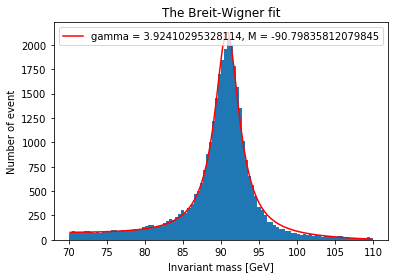

In [29]:
from scipy.optimize import curve_fit

# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110
bins = 100

# Let's select the invariant mass values that are inside the limitations.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Let's create a histogram of the selected values.
histogram = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit))

# In y-axis the number of the events per each bin (can be got from the variable histogram).
# In x-axis the centers of the bins.
y = histogram[0]
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )

# Let's define a function that describes Breit-Wigner distribution for the fit.
# E is the energy, gamma is the decay width, M the maximum of the distribution
# and a, b and A different parameters that are used for noticing the effect of
# the background events for the fit.
def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

# Initial values for the optimization in the following order:
# gamma (the full width at half maximum (FWHM) of the distribution)
# M (the maximum of the distribution)
# a (the slope that is used for noticing the effect of the background)
# b (the y intercept that is used for noticing the effect of the background)
# A (the "height" of the Breit-Wigner distribution)
initials = [50, 48, -2, 200, 1300] #THE INITIAL GUESS FOR GAMMA, #THE INITIAL GUESS FOR M, -2, 200, 13000]

# Let's import the module that is used in the optimization, run the optimization
# and calculate the uncertainties of the optimized parameters.
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = "The value of the decay width (gamma) = {} +- {}".format(best[0], error[0])
second = "The value of the maximum of the distribution (M) = {} +- {}".format(best[1], error[1])
third = "a = {} +- {}".format(best[2], error[2])
fourth = "b = {} +- {}".format(best[3], error[3])
fifth = "A = {} +- {}".format(best[4], error[4])
print(first)
print(second)
print(third)
print(fourth)
print(fifth)

plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

#### Notification 1:

If the fitted function does not follow the histogram well, go back and check the intial guesses.

#### Notification 2:

In fitting the so called background of the mass distribution is taken into account. The background basically means muon pairs that come from other decay processes than from the decay of the Z boson. The background is taken into account in the code in the line that follows the command `def breitwigner`. The fit is adapted in the background with the term `a*E+b+A`, where $aE + b$ takes care of the linear part of the background and $A$ the height of the background.

#### Notification 3:

Even more correct way for doing the fit and getting the values and the uncertainties from it would be to iterate the fit several times. In the iteration a next step would take initial guesses from the previous fit.

## Analysing the histogram

### Question 4

What can you say about the appearance of the Z boson based on the histogram and the fitted function?

Can you define the mass of the Z with the uncertainty? How?

Explain your answers with the help from the theory part and other sources.

### Question 5

Calculate the lifetime $\tau$ of the Z boson with the uncertainty by using the fit.

Compare the calculated value to the known lifetime of the Z. What do you notice? What could possibly explain your observations?

### Question 6

When was the Z boson detected first time and what is the physical meaning of the Z?

### Question 7

If energy and momentum could be measured by infinite accuracy, would there be an one exact peak that differs from the other distribution, or an distribution in the histogram on the location of the mass of the Z? Justify your answer.

## The histogram of the whole data

As an example let's also create a histogram from the all of the invariant masses in the data file without limiting near to the peak of the Z boson.

Run the code cell below to make that kind of histogram. Notice that the y-axis is logarithmic and the x-axis has logarithms to base 10 of the values of the invariant masses ( $\log_{10}(\text{value of the mass})$ ). So for example it is possible to calculate the invariant mass value in units GeV corresponding to the x-axis value of 0.5 with the following way:

$$
\log_{10}(\text{mass}) = 0.5
$$

$$
10^{\log_{10}(\text{mass})} = 10^{0.5}
$$

$$
\text{mass} = 10^{0.5} \approx 3.1622 \text{GeV}
$$

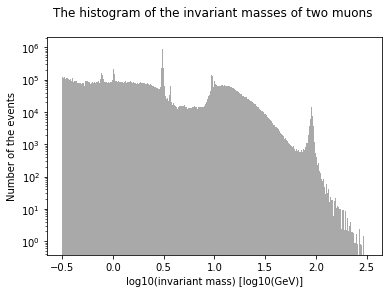

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ds = pd.read_csv('DoubleMuRun2011A.csv')
invariant_mass_1 = ds['M']

no_bins = 500
# Let's calculate the logarithms of the masses and weighs.
inv_mass_log = np.log10(invariant_mass_1)
weights = []
for a in invariant_mass_1:
    weights.append(no_bins/np.log(10)/a)

# Let's plot the weighted histogram.
plt.hist(inv_mass_log, no_bins, range=(-0.5,2.5), weights=weights, lw=0, color="darkgrey")
plt.yscale('log')

# Naming the labels and the title.
plt.xlabel('log10(invariant mass) [log10(GeV)]')
plt.ylabel('Number of the events')
plt.title('The histogram of the invariant masses of two muons \n')
plt.show()

### Question 8

Compare the histogram that you created to the histogram published by the CMS experiment in the image 10 below. What can you notice? Use the Particle Data Group web site if needed.

<figure>
    <img src="images/CMShistogram.png" alt="image missing" style="height: 350px" />
    <figcaption>Image 10: The histogram of the invariant masses published by the CMS experiment. &copy; <a href="https://arxiv.org/abs/1206.4071">CMS Collaboration</a> [5]</figcaption>
</figure>

## Effect of pseudorapidity to the mass distribution


In this final section it will be shortly studied how does pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution.

As it was told in the theory part, pseudorapidity $\eta$ describes an angle of which the detected particle has differed from the particle beam (z-axis). Pseudorapidity is determined with the angle $\theta$ mentioned before with the equation

$$
\eta = -\ln(\tan(\frac{\theta}{2}))
$$

For recap the image 8 is shown again below. From the image one can see that a small pseudorapidity in practice means that the particle has differed lot from the particle beam. And vice versa: greater pseudorapidity means that the particle has continued almost among the beam line after the collision.

<figure>
    <img src="images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 8: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

The image 11 below shows a situation where two particle beams from left and right collide. The image shows two muons with different pseudorapidities. The muon with the smaller pseudorapidity hits the barrel part of the detector when the muon with the greater pseudorapidity goes to the endcap of the detector. There are also muon chambers in the both ends of the detector so these muons can also be detected.

<figure>
    <img src="images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 11: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

In this final section it will be studied that how does pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution. For doing that, two different histograms will be made: an one with only muon pairs with small pseudorapidities and an one with great pseduorapidities. The histograms will be made with the familiar method from the earlier part of this exercise.

### Selecting the events

Next let’s create two variables for dividing the events: `small_etas` and `great_etas`. To the first one will be saved only collision events where pseudorapidities of the both detected muons have been small (for example under 0.38). And respectively to the second those whose pseudorapidities have been great (for example over 1.52). Absolute values will be used because $\eta$ can get also negative values.

Complete the code cell below by determining the variables `small_etas` and `great_etas` in a way that the division described above will be made. You will need the following functions:

- `ds[condition]` selects from the variable `ds` only events which fulfill the condition written inside the brackets. There can also be more than one condition. Then the function is in the form `ds[(condition1) & (condition2)]`
- an example of this could be a function where from the variable `example` only rows where the values of the columns `a` and `b` have been both greater than 8 would be selected: `example[(example.a > 8) & (example.b > 8)]`
- you can get the absolute values with the function `np.absolute()` from the _numpy_ module
- pseudorapidity of the first muon is `ds.eta1` and the second `ds.eta2`
- ”greater than” and ”smaller than” comparisons can be made in Python straight with the symbols > and <
- Python uses a dot as a decimal separator (for example 0.38)

<details>
    <summary>Hint 1</summary>
    
    Remember to define the small values in a way that both eta1 and eta2 have been smaller than 0.38. And same for the large values.
</details>

<details>
    <summary>Hint 2</summary>
    
    Remember to tell from which variable you want to get the values of the pseudorapidities (write ds.eta1 or ds.eta2). Remember to use "np." in front of the aboslute value function.
</details>

<details>
    <summary>Hint 3</summary>
    
    The first variable with the conditions is "great_etas = ds[(np.absolute(ds.eta1) > 1.52) & (np.absolute(ds.eta2) > 1.52)]" and the second "small_etas = ds[(np.absolute(ds.eta1) < 0.38) & (np.absolute(ds.eta2) < 0.38)]".
</details>

In [35]:
# Let's import the needed modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# With this line the data is imported and saved to the variable "ds".
ds = pd.read_csv('DoubleMuRun2011A.csv')

great_etas = ds[(np.absolute(ds.eta1) < 0.38) & (np.absolute(ds.eta2) < 0.38)]
small_etas = ds[(np.absolute(ds.eta1) > 1.52) & (np.absolute(ds.eta2) > 1.52)]

# Let's print out some information about the selection
print('Amount of all events = %d' % len(ds))
print('Amount of the events where the pseudorapidity of the both muons have been large = %d' %len(great_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small = %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large = 34337
Amount of the events where the pseudorapidity of the both muons have been small = 34263


### Creating the histograms


Run the code cell below to create separate histograms from the events with small and with great values of pseudorapidities. The cell will get the invariant masses for both of the selections and will create the histograms out of them near to the peak that refers to the Z boson.

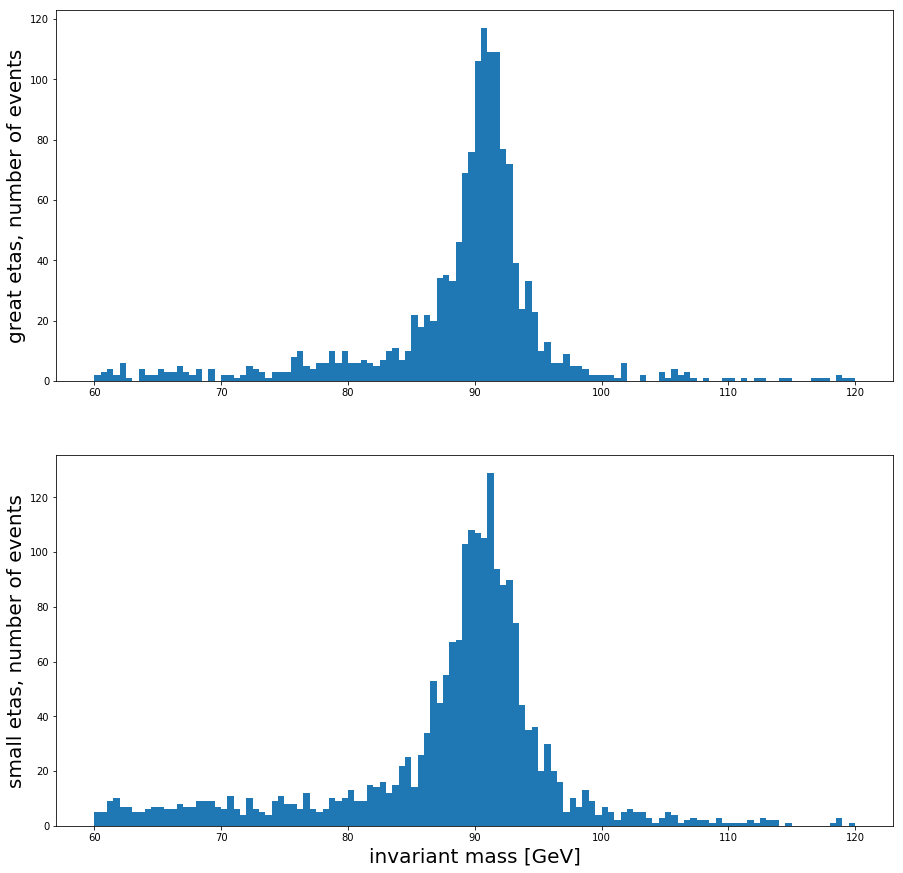

In [36]:
# Let's differ the invariant masses of the large and small pseudorapidity
# events for making the histograms.
inv_mass_great = great_etas['M']
inv_mass_small = small_etas['M']

# Let's use the matplotlib.pyplot module to create a custom size
# figure where the two histograms will be plotted.
f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)
plt.subplot(211)
plt.hist(inv_mass_great, bins=120, range=(60,120))
plt.ylabel('great etas, number of events', fontsize=20)
plt.subplot(212)
plt.hist(inv_mass_small, bins=120, range=(60,120))
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

### Question 9

Compare the two histograms that were created above. In which way the pseudorapidities of the muons affect to the mass distribution?

What could possibly explain your observations?

First think the explanation by yourself and after that open the explanation below to see how you managed out.

<details>
    <summary>Click here to open the explanation</summary>
    
    From the histograms one can see that the events where the pseudorapidity of both of the muons have been small, will produce more narrow peak than the events with the muons with great pseudorapidities. That means that the resolution of the invariant masses have been worse with the great pseudorapidities.
    
    The worse resolution follows from the fact that the resolution of the transverse momentum (p_t, the component of momentum that is perpendicular to the particle beams) has been worse for the muons with great pseudorapidities. This can be seen for example from the image 21 on page 32 of the paper https://arxiv.org/pdf/1206.4071.pdf of the CMS Collaboration.
    
    The explanation for the effect of the pseudorapidity to the resolution is that the particles which head to the endcap of the detector (great pseudorapidities) will more probably interact with the material of the detector than the muons with smaller pseudorapidities (check the image 11). In these interactions muons will lose some of their energy. This messes up slightly the fitting of the trajectories of the muons and the measurement of the transverse momentum. It also effects to the situation that the measurement of the transverse momentum is easily depended for example from the orientation of the muon chambers, from the division of the material of the detector and from the magnetic field. It can be assumed that these things are worse known for the particles that have great pseudorapidities.
</details>

## In the end

Now you have completed the exercise. Feel free to go back and test some different values to the code and see what happens. You can also create a new code cell by clicking "INSERT" -> "Insert Cell Below" and try to write some own code too!

More information about the CERN Open Data can be found from http://opendata.cern.ch/.

### Sources

[1] P. Mouche, *Overall view of the LHC. Vue d'ensemble du LHC*, 2014.
Url: [https://cds.cern.ch/record/1708847](https://cds.cern.ch/record/1708847).

[2] M. Brice, *View of an open LHC interconnection. Vue d'une interconnection ouverte*, 2005.
Url: [https://cds.cern.ch/record/905940](https://cds.cern.ch/record/905940)

[3] CMS Collaboration, *Detector Drawings*, 2012.
Url: [https://cds.cern.ch/record/1433717](https://cds.cern.ch/record/1433717).

[4] M. Lapka, D. Barney, E. Quigg et al., *Interactive slice of CMS detector*, 2010.
Url: [https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172).

[5] CMS Collaboration, *Performance of CMS muon reconstruction in pp collision events at $\sqrt{s} =$ 7 TeV*, 2012.
Url: [arXiv:1206.4071](https://arxiv.org/abs/1206.4071).